# Image Matting Assignment

### Images and Backgrounds used

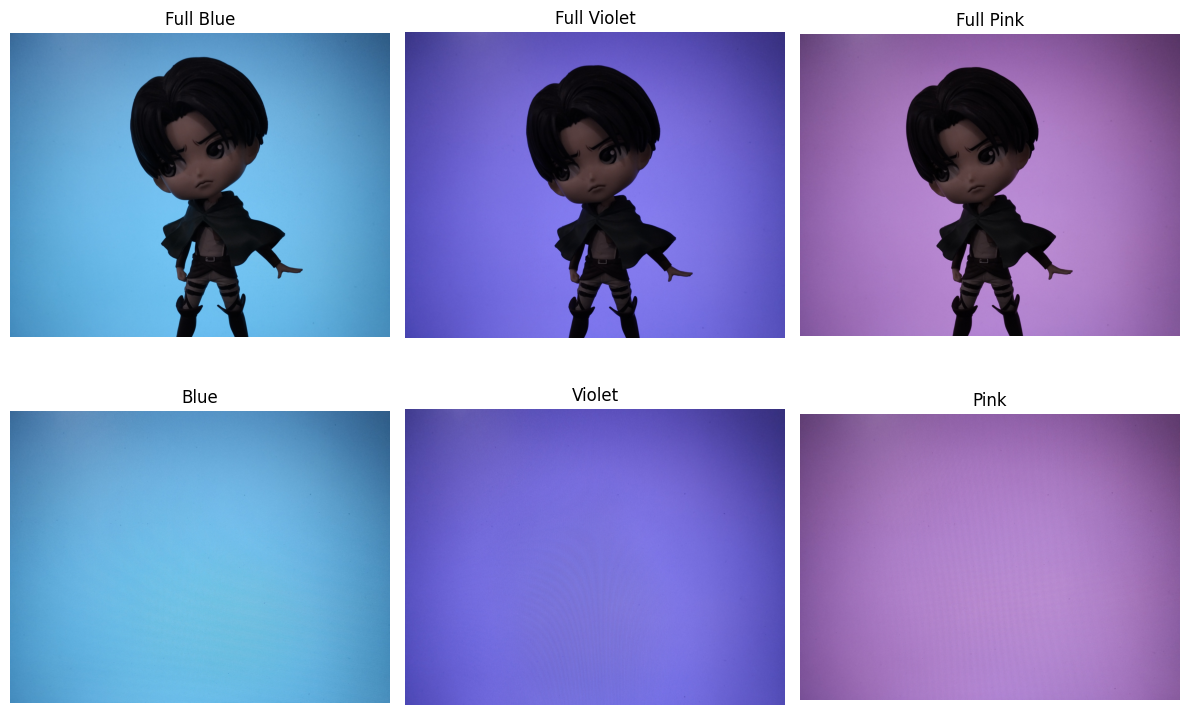

In [24]:
import cv2
import matplotlib.pyplot as plt

full_blue = cv2.imread('full_blue.jpg')
full_violet = cv2.imread('full_violet.jpg')
full_pink = cv2.imread('full_pink.jpg')
blue = cv2.imread('blue.jpg')
violet = cv2.imread('violet.jpg')
pink = cv2.imread('pink.jpg')

# Display the images and backgrounds
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(cv2.cvtColor(full_blue, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Full Blue')

axes[0, 1].imshow(cv2.cvtColor(full_violet, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Full Violet')

axes[0, 2].imshow(cv2.cvtColor(full_pink, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Full Pink')

axes[1, 0].imshow(cv2.cvtColor(blue, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Blue')

axes[1, 1].imshow(cv2.cvtColor(violet, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Violet')

axes[1, 2].imshow(cv2.cvtColor(pink, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Pink')

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

### Triangulation Matting

In [25]:
import cv2
import numpy as np

def linearize(image):
    linear_image = np.float32(image) / 255.0
    linear_image = np.power(linear_image, 2.2)  # Gamma correction
    return linear_image

def triangulation_matting(compA, compB, backA, backB):
    # r -> 0; g -> 1; b -> 2
    cAr, cAg, cAb = compA[:, :, 0], compA[:, :, 1], compA[:, :, 2]
    cBr, cBg, cBb = compB[:, :, 0], compB[:, :, 1], compB[:, :, 2]
    bAr, bAg, bAb = backA[:, :, 0], backA[:, :, 1], backA[:, :, 2]
    bBr, bBg, bBb = backB[:, :, 0], backB[:, :, 1], backB[:, :, 2]

    alpha = 1 - (((cAr- cBr) * (bAr - bBr) + (cAg - cBg) * (bAg - bBg) + (cAb - cBb) * (bAb - bBb)) /
                 +((bAr - bBr) ** 2 + (bAg - bBg) ** 2 + (bAb - bBb) ** 2))

    newAlpha = np.zeros(backA.shape)
    newAlpha[:, :, 0] = alpha
    newAlpha[:, :, 1] = alpha
    newAlpha[:, :, 2] = alpha

    color = compA - (1-newAlpha)*backA

    return color, alpha

# Load gamma-corrected images
full_blue = cv2.imread('full_blue.jpg')
full_violet = cv2.imread('full_violet.jpg')
full_pink = cv2.imread('full_pink.jpg')
blue = cv2.imread('blue.jpg')
violet = cv2.imread('violet.jpg')
pink = cv2.imread('pink.jpg')

# Ensure all images have the same dimensions (resize if necessary)
common_shape = (full_blue.shape[1], full_blue.shape[0])  # Assuming all images have the same width
full_blue = cv2.resize(full_blue, common_shape)
full_violet = cv2.resize(full_violet, common_shape)
full_pink = cv2.resize(full_pink, common_shape)
blue = cv2.resize(blue, common_shape)
violet = cv2.resize(violet, common_shape)
pink = cv2.resize(pink, common_shape)

# Linearize the images
linear_full_blue = linearize(full_blue)
linear_full_violet = linearize(full_violet)
linear_full_pink = linearize(full_pink)
linear_blue = linearize(blue)
linear_violet = linearize(violet)
linear_pink = linearize(pink)

# Perform triangular matting
estimated_foreground, estimated_alpha = triangulation_matting(linear_full_blue, linear_full_violet, linear_blue, linear_violet)

In [26]:
estimated_foreground

array([[[-0.10574445, -0.02826151, -0.0035679 ],
        [-0.06637706, -0.01894014, -0.00623619],
        [-0.04339115, -0.01094538, -0.00537753],
        ...,
        [ 0.06654814,  0.0238194 ,  0.00388283],
        [ 0.04560169,  0.01456599,  0.00169502],
        [ 0.05242768,  0.01284673, -0.00191674]],

       [[-0.05888846, -0.01465219, -0.00442057],
        [-0.0439207 , -0.01213512, -0.00635428],
        [-0.04420289, -0.0112904 , -0.00556318],
        ...,
        [ 0.0215234 ,  0.00569722,  0.0008758 ],
        [-0.01353521, -0.00670481,  0.00019388],
        [-0.005664  , -0.00689041, -0.00250738]],

       [[-0.04991675, -0.01280029, -0.00536522],
        [-0.04241863, -0.01049685, -0.00544927],
        [-0.06598446, -0.0177927 , -0.00542062],
        ...,
        [ 0.0089293 ,  0.00157994,  0.00090423],
        [ 0.02952452,  0.00770082,  0.00027997],
        [ 0.05401138,  0.01279187, -0.00181039]],

       ...,

       [[-0.04059786, -0.03243025, -0.00949385],
        [ 0

In [27]:
estimated_alpha

array([[-0.36938524, -0.13623798, -0.03691089, ...,  0.38504303,
         0.29916722,  0.43509758],
       [-0.1291424 , -0.02368879, -0.0380944 , ...,  0.16688496,
        -0.03940272,  0.07285416],
       [-0.06932271, -0.03136587, -0.14639032, ...,  0.08634144,
         0.23576856,  0.48299307],
       ...,
       [-0.04173994,  0.08728123,  0.17451876, ...,  0.14670545,
         0.14835411,  0.11405826],
       [-0.17991829, -0.08292663,  0.03157938, ...,  0.24449188,
         0.16909832,  0.08463103],
       [-0.11165583,  0.05351579,  0.12816322, ...,  0.07482892,
         0.09721464,  0.08463103]], dtype=float32)

In [28]:
def array_to_image(array):
    # Scale the values to the range [0, 255]
    scaled_array = np.clip(array * 255, 0, 255)
    # Convert to uint8 data type
    uint8_array = scaled_array.astype(np.uint8)
    # Return the image
    return uint8_array

# Convert arrays to images
foreground_image = array_to_image(estimated_foreground)
alpha_image = array_to_image(estimated_alpha)

# Save or display the images
cv2.imwrite('estimated_foreground.jpg', foreground_image)
cv2.imwrite('estimated_alpha.jpg', alpha_image)

True

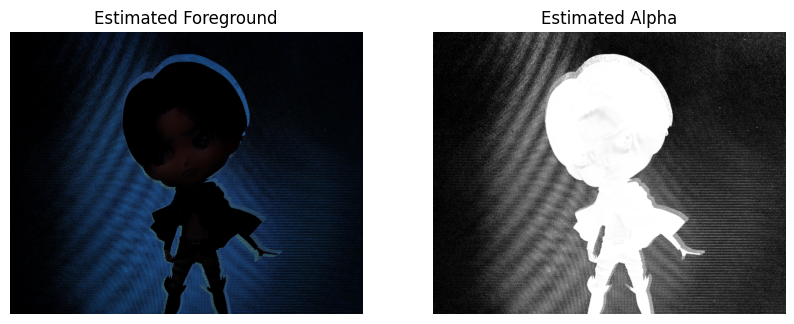

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the saved images
foreground_image = mpimg.imread('estimated_foreground.jpg')
alpha_image = mpimg.imread('estimated_alpha.jpg')

# Display the images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(foreground_image)
plt.title('Estimated Foreground')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(alpha_image, cmap='gray')
plt.title('Estimated Alpha')
plt.axis('off')

plt.show()


### Knockout Matting

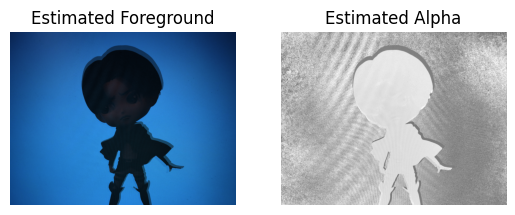

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def knockout_matting(compA, compB, backA, backB):
    # Resize images to have the same dimensions
    min_height = min(compA.shape[0], compB.shape[0], backA.shape[0], backB.shape[0])
    min_width = min(compA.shape[1], compB.shape[1], backA.shape[1], backB.shape[1])
    compA = cv2.resize(compA, (min_width, min_height))
    compB = cv2.resize(compB, (min_width, min_height))
    backA = cv2.resize(backA, (min_width, min_height))
    backB = cv2.resize(backB, (min_width, min_height))

    F = (compA + compB) / 2
    B = (backA + backB) / 2

    diff_FB = F - B
    diff_CB = compA - backA

    # Handle division by zero by replacing zeros with a small positive value
    norm_diff_CB = np.linalg.norm(diff_CB, axis=2)
    norm_diff_CB[norm_diff_CB == 0] = 1e-6  # Replace zeros with a small positive value

    # Calculate alpha matte
    alpha = np.linalg.norm(diff_FB, axis=2) / norm_diff_CB

    # Clip alpha values to [0, 1]
    alpha = np.clip(alpha, 0, 1)

    # Calculate estimated foreground color
    estimated_foreground = alpha[..., np.newaxis] * compA + (1 - alpha[..., np.newaxis]) * backA

    return estimated_foreground, alpha

full_blue = plt.imread('full_blue.jpg')
full_violet = plt.imread('full_violet.jpg')
blue = plt.imread('blue.jpg')
violet = plt.imread('violet.jpg')

linear_full_blue = linearize(full_blue)
linear_full_violet = linearize(full_violet)
linear_blue = linearize(blue)
linear_violet = linearize(violet)

# Perform Matting
estimated_foreground, estimated_alpha = knockout_matting(linear_full_blue, linear_full_violet, linear_blue, linear_violet)

# Save the estimated foreground and alpha images
plt.imsave('estimated_foreground_knockout.png', estimated_foreground)
plt.imsave('estimated_alpha_knockout.png', estimated_alpha, cmap='gray')

# Display the saved images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(estimated_foreground)
axes[0].set_title('Estimated Foreground')
axes[0].axis('off')
axes[1].imshow(estimated_alpha, cmap='gray')
axes[1].set_title('Estimated Alpha')
axes[1].axis('off')
plt.show()

### Bayesian Matting

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3188\3756985314.py:21: RuntimeWarning: divide by zero encountered in divide
  alpha = np.linalg.norm(diff_FB, axis=2) / np.linalg.norm(diff_CB, axis=2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3188\3756985314.py:21: RuntimeWarning: invalid value encountered in divide
  alpha = np.linalg.norm(diff_FB, axis=2) / np.linalg.norm(diff_CB, axis=2)


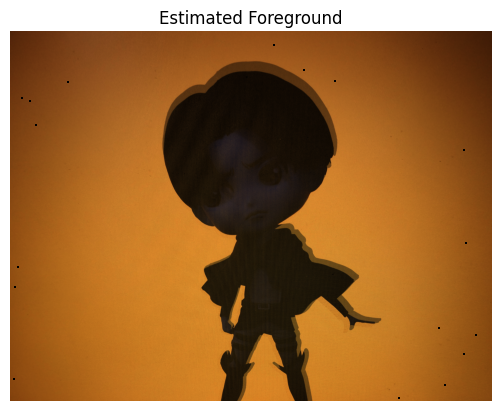

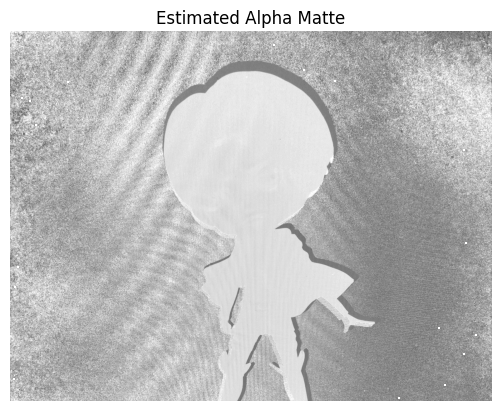

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bayesian_matting(compA, compB, backA, backB):
    # Resize images to have the same dimensions
    min_height = min(compA.shape[0], compB.shape[0], backA.shape[0], backB.shape[0])
    min_width = min(compA.shape[1], compB.shape[1], backA.shape[1], backB.shape[1])
    compA = cv2.resize(compA, (min_width, min_height))
    compB = cv2.resize(compB, (min_width, min_height))
    backA = cv2.resize(backA, (min_width, min_height))
    backB = cv2.resize(backB, (min_width, min_height))

    # Calculate per-pixel foreground F and background B color estimates
    F = (compA + compB) / 2
    B = (backA + backB) / 2

    # Adjust background color to lie on the line between F and B
    diff_FB = F - B
    diff_CB = compA - backA
    alpha = np.linalg.norm(diff_FB, axis=2) / np.linalg.norm(diff_CB, axis=2)

    # Clip alpha values to [0, 1]
    alpha = np.clip(alpha, 0, 1)

    # Calculate estimated foreground color
    estimated_foreground = alpha[..., np.newaxis] * compA + (1 - alpha[..., np.newaxis]) * backA

    return estimated_foreground, alpha

full_blue = plt.imread('full_blue.jpg')
full_violet = plt.imread('full_violet.jpg')
blue = plt.imread('blue.jpg')
violet = plt.imread('violet.jpg')

linear_full_blue = linearize(full_blue)
linear_full_violet = linearize(full_violet)
linear_blue = linearize(blue)
linear_violet = linearize(violet)

# Perform Matting
estimated_foreground, estimated_alpha = bayesian_matting(linear_full_blue, linear_full_violet, linear_blue, linear_violet)

# Display the estimated foreground
plt.imshow(cv2.cvtColor(estimated_foreground, cv2.COLOR_BGR2RGB))
plt.title('Estimated Foreground')
plt.axis('off')
plt.show()

# Display the estimated alpha matte
plt.imshow(estimated_alpha, cmap='gray')
plt.title('Estimated Alpha Matte')
plt.axis('off')
plt.show()
